In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields

In [15]:
from skimage import io, color, measure
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

outputdir = 'D:/Projects/mumax3.9.1_windows/crbr3_bubble4.out' #D:\Projects\mumax3.9.1_windows
fields = read_mumax3_ovffiles(outputdir)
print(fields.keys())
os.chdir(outputdir)
mypath=os.getcwd()

#m = fields["m"]
mfm20 = fields["MFM_lift_20nm"]
mfm30 = fields["MFM_lift_30nm"]
mfm50 = fields["MFM_lift_50nm"]
mfm70 = fields["MFM_lift_70nm"]
mfm80 = fields["MFM_lift_80nm"]

mfmz = mfm20[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm30[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm50[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm70[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm80[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

#ssim_value = measure.compare_ssim(mz1, mz2)
#print(ssim_value)

ImportError: cannot import name run

# multiple m.ovf processor

D:\Projects\mumax3.9.1_windows\analysis


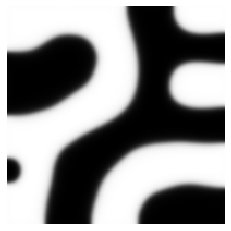

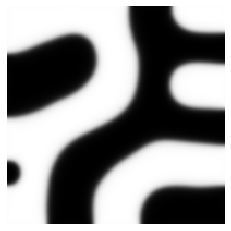

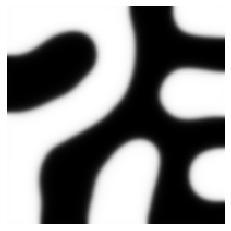

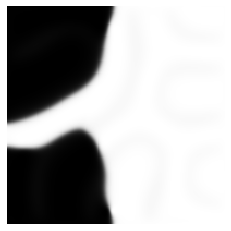

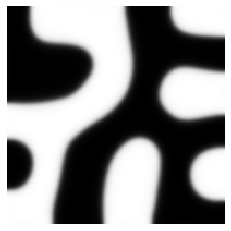

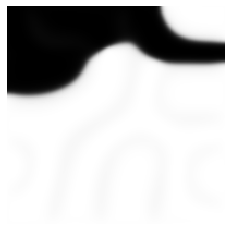

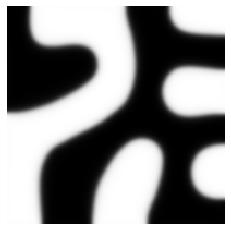

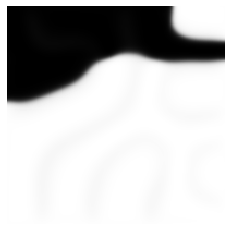

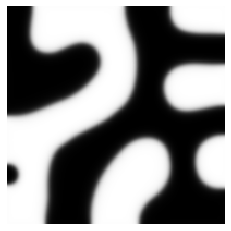

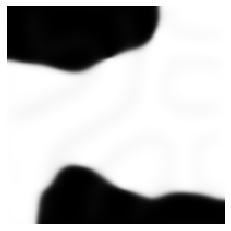

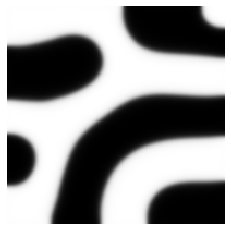

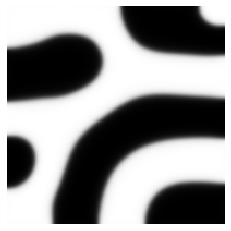

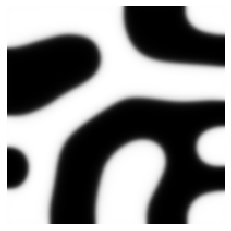

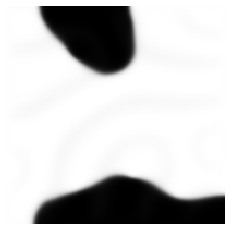

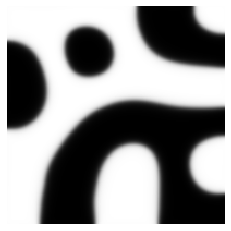

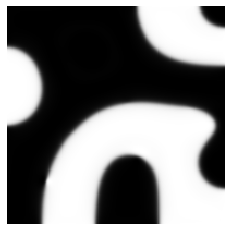

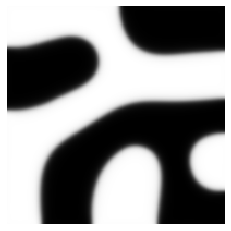

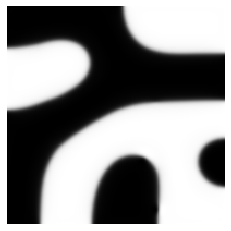

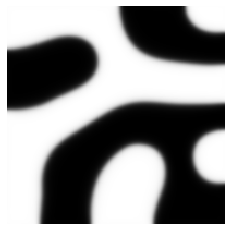

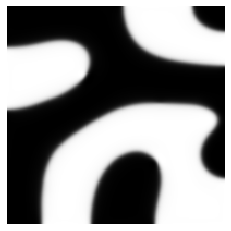

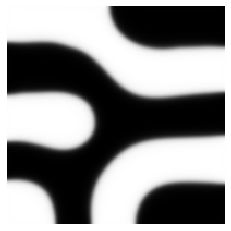

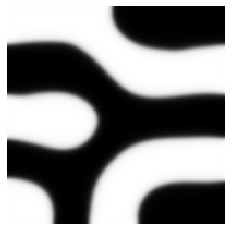

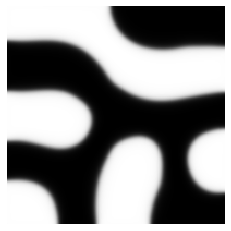

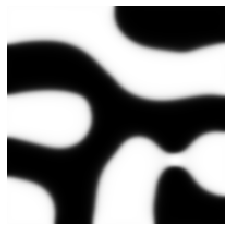

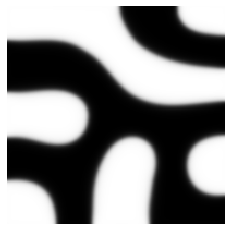

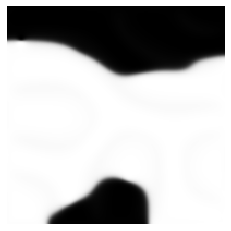

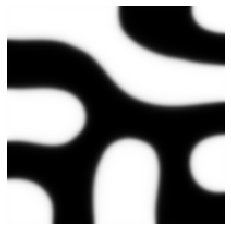

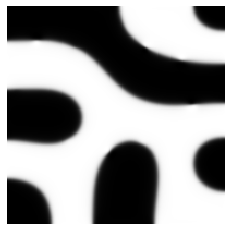

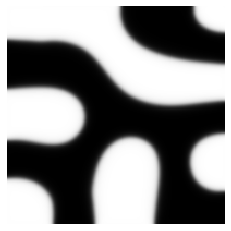

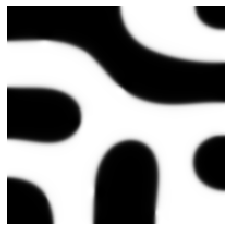

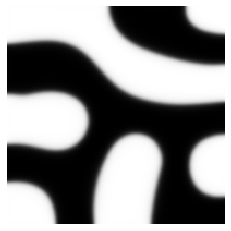

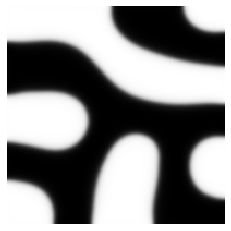

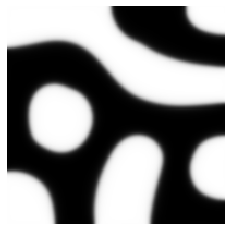

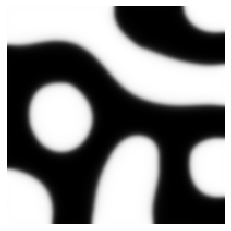

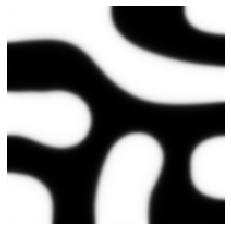

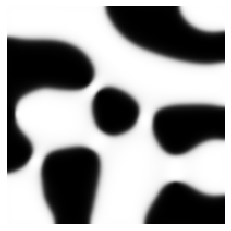

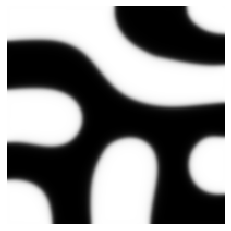

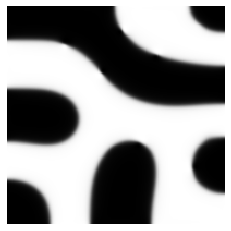

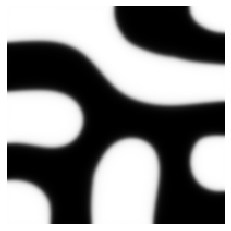

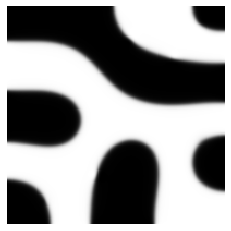

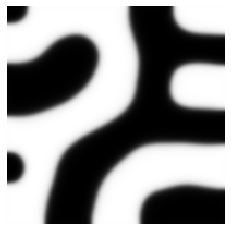

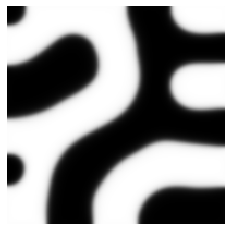

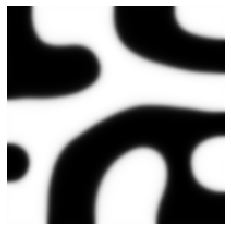

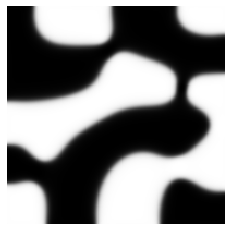

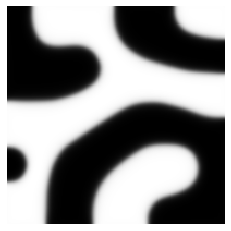

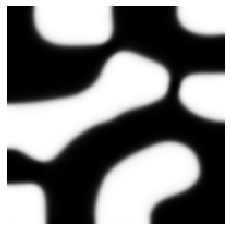

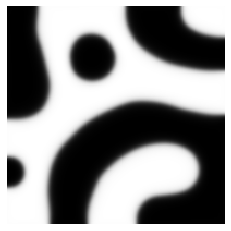

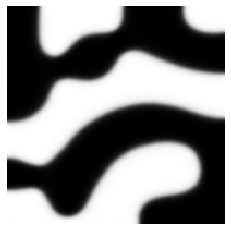

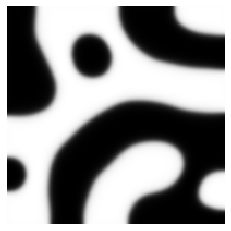

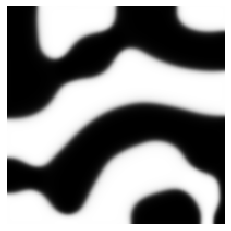

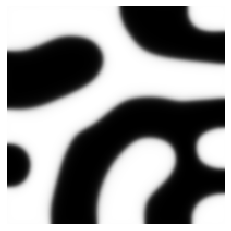

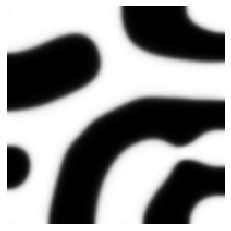

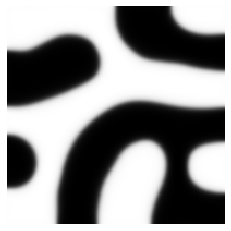

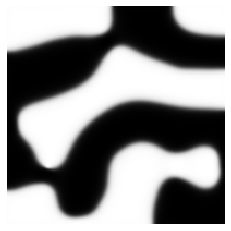

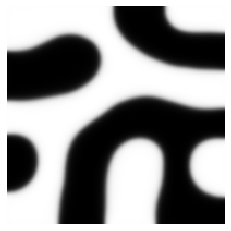

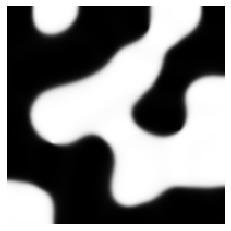

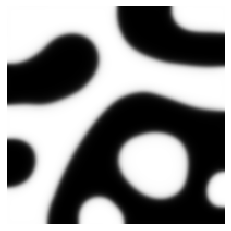

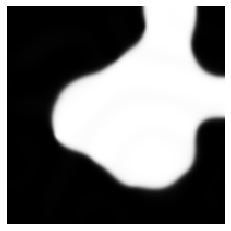

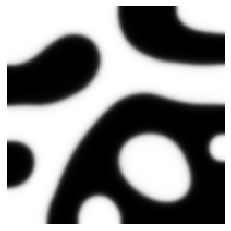

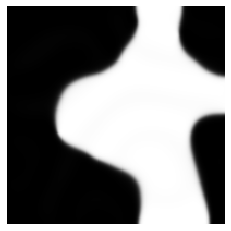

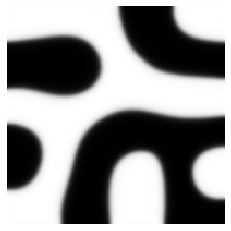

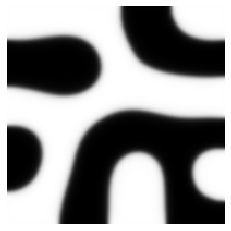

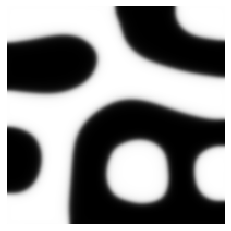

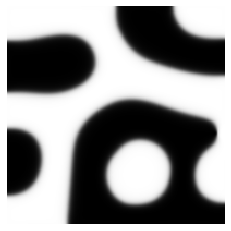

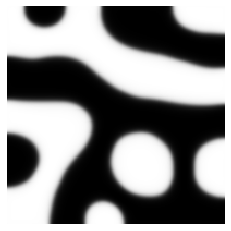

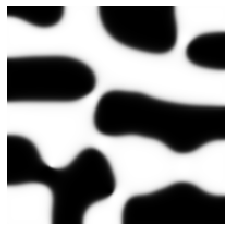

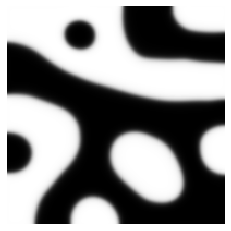

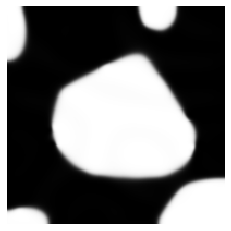

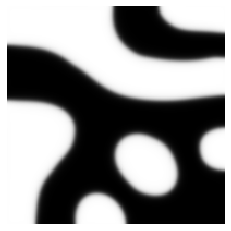

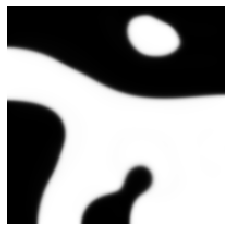

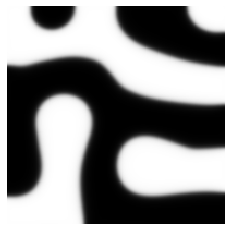

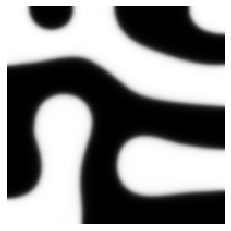

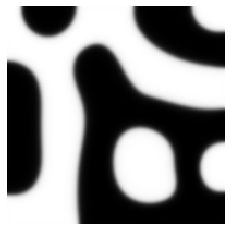

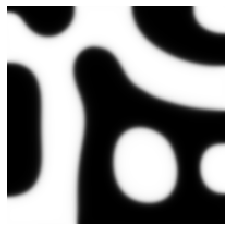

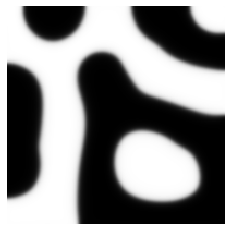

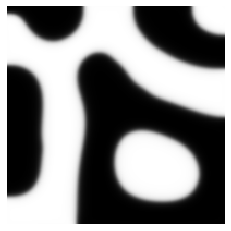

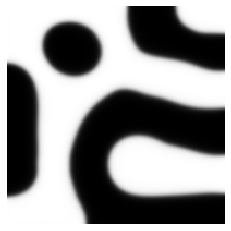

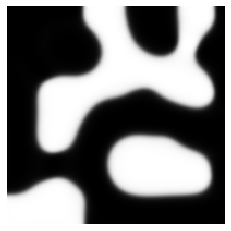

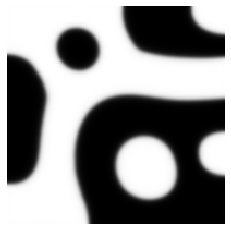

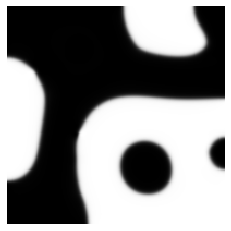

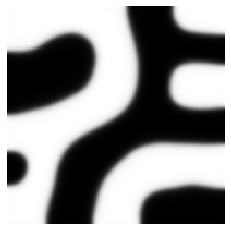

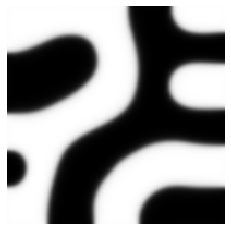

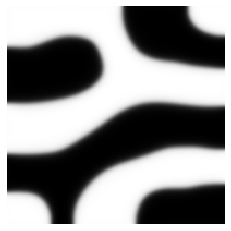

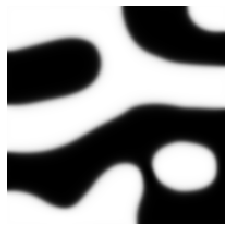

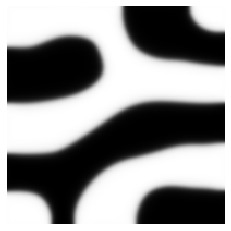

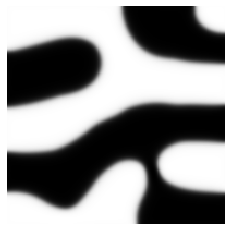

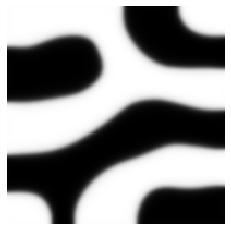

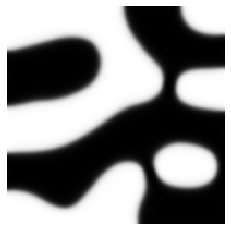

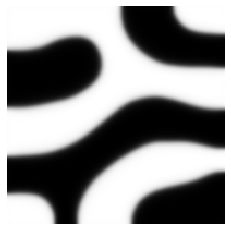

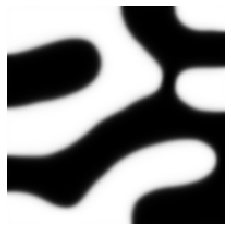

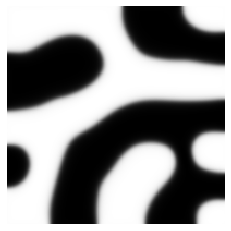

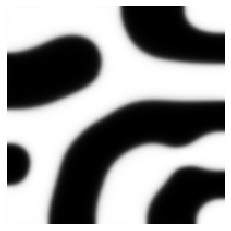

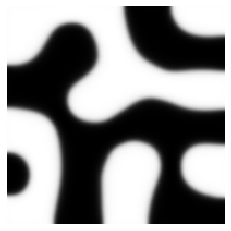

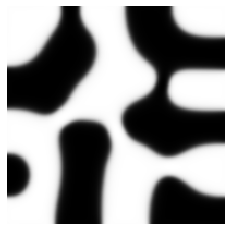

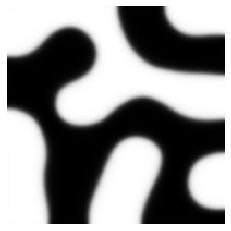

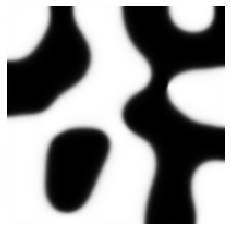

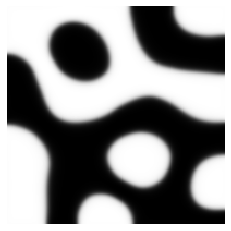

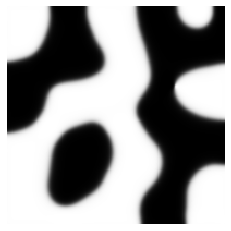

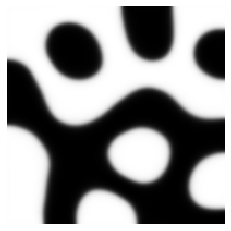

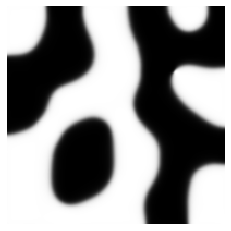

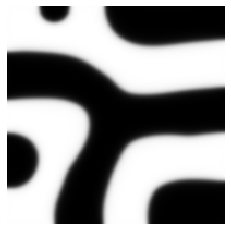

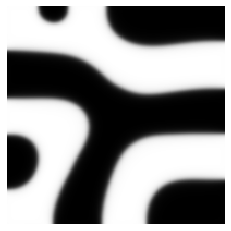

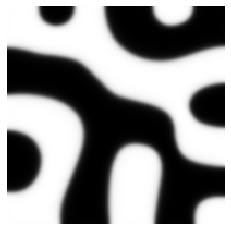

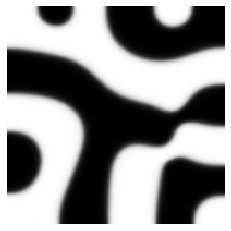

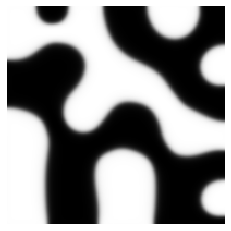

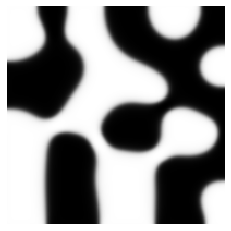

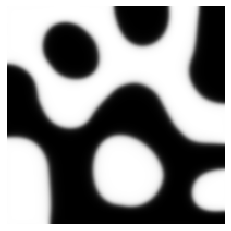

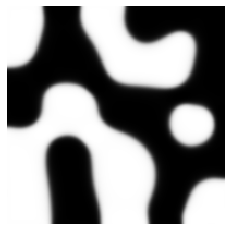

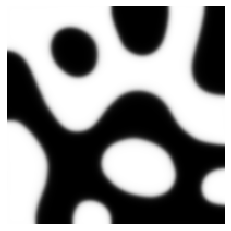

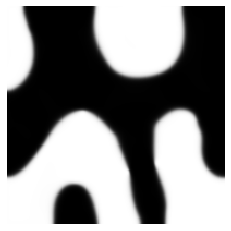

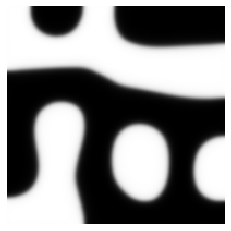

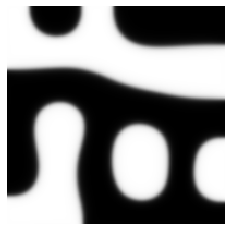

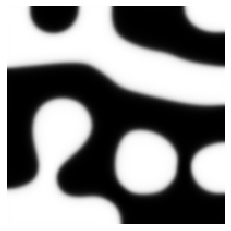

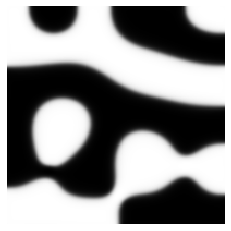

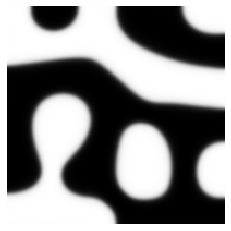

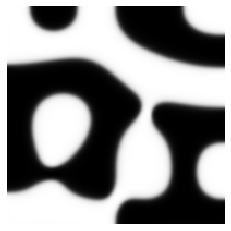

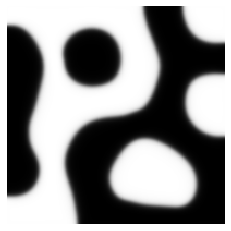

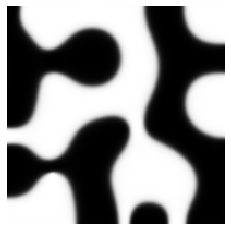

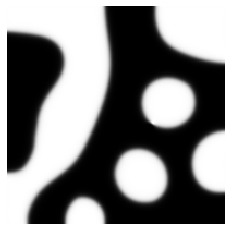

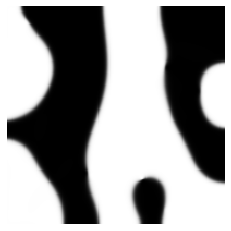

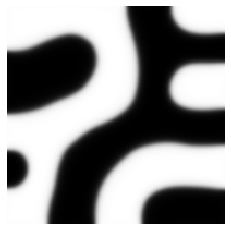

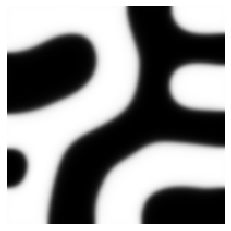

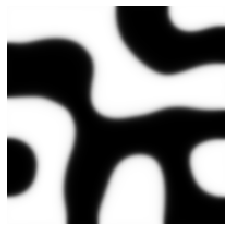

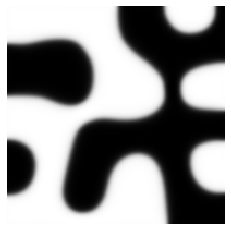

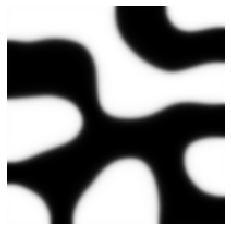

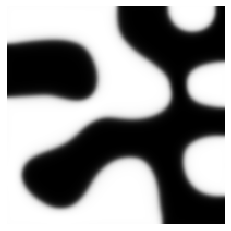

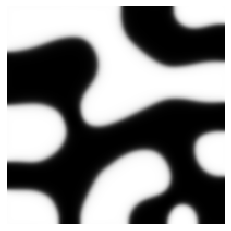

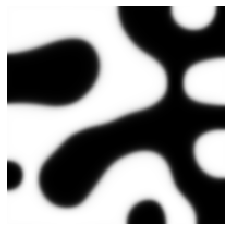

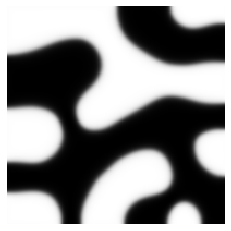

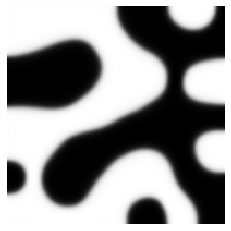

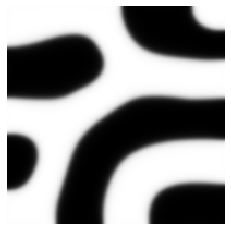

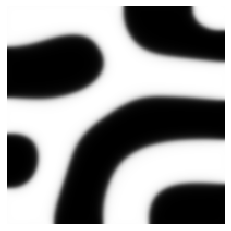

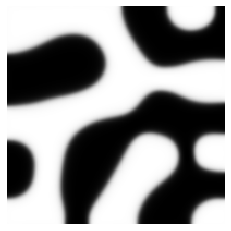

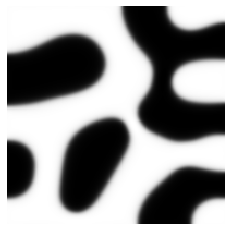

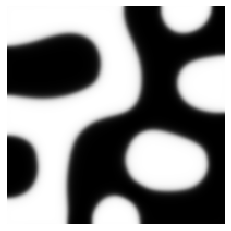

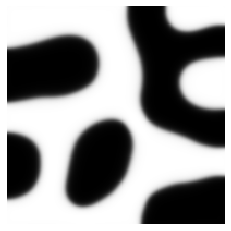

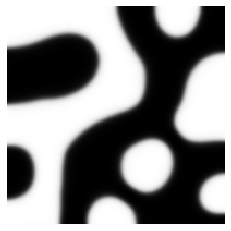

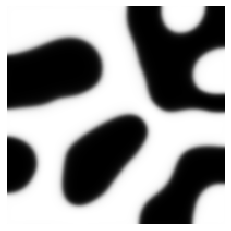

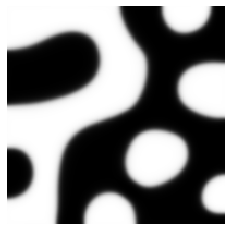

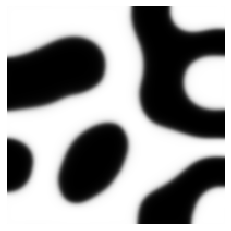

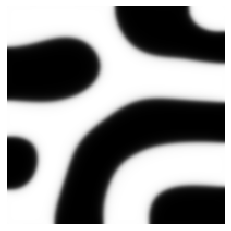

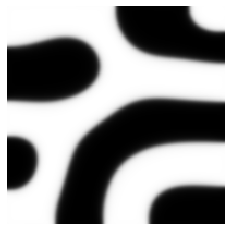

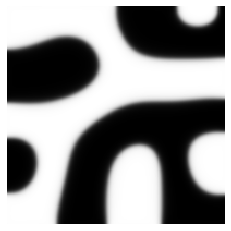

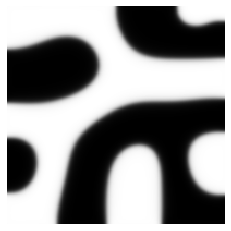

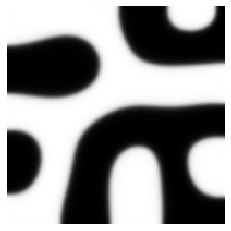

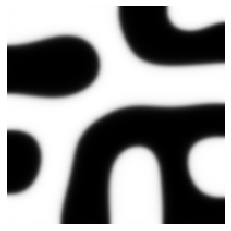

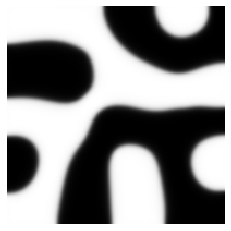

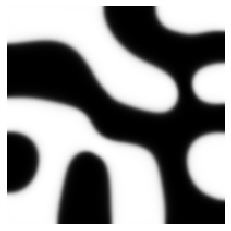

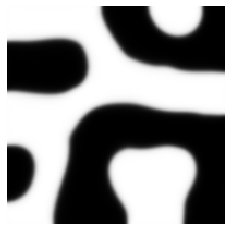

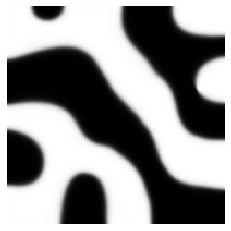

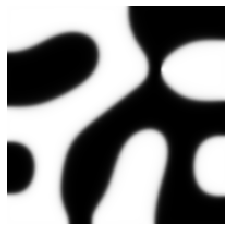

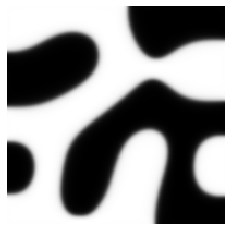

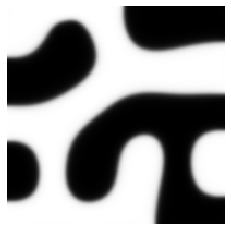

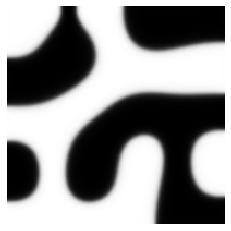

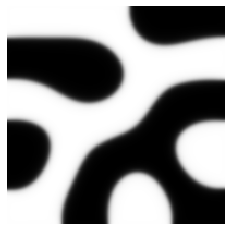

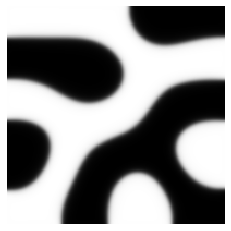

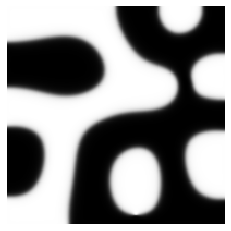

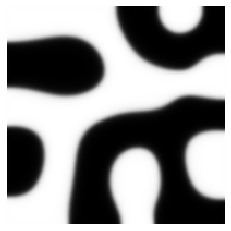

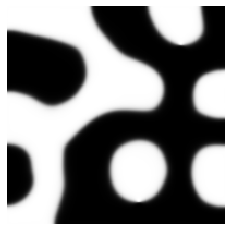

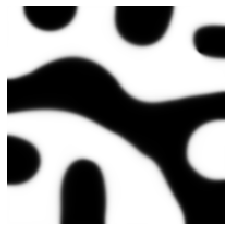

In [20]:
from skimage import io, color, measure
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

os.chdir('D:/Projects/mumax3.9.1_windows/analysis/')
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf" and f.split(".")[-1] != "csv"]
for file in files:
    m = fields[os.path.splitext(file)[0]]
    mz1 = m[2,0,:,:]
    plt.figure()
    plt.imshow(mz1, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz1, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title1 = os.path.splitext(file)[0] + '_1' + '.png'
    plt.savefig(os.path.join(mypath, title1), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    
    mz2 = m[2,24,:,:]
    plt.figure()
    plt.imshow(mz2, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz2, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title2 = os.path.splitext(file)[0] + '_2' + '.png'
    plt.savefig(os.path.join(mypath, title2), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    
    ssim_value = measure.compare_ssim(mz1, mz2)
    #print(os.path.splitext(file)[0])
    #print(ssim_value)
    ncc_value = ncc(mz1, mz2)
    #orb = orb_similarity(mz1, mz2)
    #pearson = pearson_correlation(mz1, mz2)
    #ssim_pearson = structural_pearson_similarity(mz1, mz2)
    psnr = psnr_value(mz1, mz2, max_pixel=1.0)
    
    row = [os.path.splitext(file)[0], ssim_value, ncc_value, mse_score(mz1, mz2), psnr]
    data_list.append(row)

#print(data_list)
output_file = "data.csv"

# Write the data list to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in data_list:
        writer.writerow(row)

In [5]:
import csv
output_file = "data.csv"

# Write the data list to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in data_list:
        writer.writerow(row)

# MFM.ovf processor

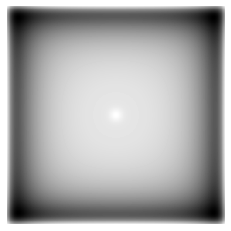

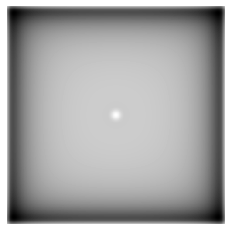

In [6]:
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

os.chdir('D:/Projects/mumax3.9.1_windows/crbr3_bubble7-in-v2.out/mfm')
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf"]
for file in files:
    mfm_data = fields[os.path.splitext(file)[0]]
    mfm = mfm_data[0,10]
    plt.figure()
    plt.axis('off')
    fig = plt.imshow(mfm, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title = os.path.splitext(file)[0] + '.png'
    plt.savefig(os.path.join(mypath, title), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

## converting from png to ovf

In [17]:
import numpy as np


os.chdir('D:/Projects/mumax3.9.1_windows/init_magn_mfm')
mypath=os.getcwd()

# Load a PNG image using a library like PIL (Pillow)
from PIL import Image
img = Image.open("mfm_mz.png")
img_data = np.array(img)

# Assuming 'img_data' represents the magnetization configuration from the image
# You may need to scale and convert the image data as per your simulation requirements

# Create an OVF file with the magnetization data
ovf_header = """# OOMMF OVF 2.0
Segment
# Segment count: 1
# Begin: Segment
# Begin: Header
# Title: m
# meshtype: rectangular
# meshunit: m
# xmin: 0
# ymin: 0
# zmin: 0
# xmax: 4.0000000000000003e-07
# ymax: 4.0000000000000003e-07
# zmax: 5.0000000000000004e-08
# valuedim: 3
# valuelabels: m_x m_y m_z
# valueunits: 1 1 1
# Desc: Total simulation time:  5.000000000000001e-09  s
# xbase: 1e-09
# ybase: 1e-09
# zbase: 1e-09
# xnodes: 200
# ynodes: 200
# znodes: 25
# xstepsize: 2e-09
# ystepsize: 2e-09
# zstepsize: 2e-09
# End: Header
# Begin: Data Binary 4
"""

# Create a constant magnetization vector along the z-axis for all layers
magnetization = np.zeros((img_data.shape[0], img_data.shape[1], 3))
magnetization[:, :, 2] = 1.0  # Set the z-component to 1, representing magnetization along the z-axis

# Create an OVF file with the magnetization data
ovf_filename = "output.ovf"
with open(ovf_filename, "wb") as ovf_file:
    ovf_file.write(ovf_header.encode("utf-8"))
    ovf_file.write(magnetization.tobytes())
    
print(f"Conversion complete. OVF file saved as {ovf_filename}")

Conversion complete. OVF file saved as output.ovf


# ssim for .png images

In [ ]:
mz1exp =  
mz2exp = 

ssim_value = measure.compare_ssim(mz1, mz2)
print(ssim_value)

In [7]:
import os
from os import listdir
from os.path import isfile, join, realpath
from skimage import io, color, measure, metrics
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 

In [22]:
import os
from os import listdir
from os.path import isfile, join, realpath
from skimage import io, color, measure, metrics
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 


def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Compute SSIM
    ssim = metrics.structural_similarity(img1, img2)

    return ssim


# Example usage
mypath = 'C:/Users/e0546063/Downloads/ssim_tests/'
image_path_1 = 'D:/d1.png'
image_path_2 = 'D:/d2.png'
#imageinv = cv2.bitwise_not(image_path_1)
ssim_value = calculate_ssim(image_path_1, image_path2)



img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

#ssim_value2 = calculate_ssim(img1, img2)

img1 = np.array(img1)
img2 = np.array(img2)

#img1norm = img1/np.sum(img1)
#img2norm = img2/np.sum(img2)

plt.figure()
plt.imshow(img1norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img1, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(img2norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img2, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()

#image_path_1n = 'C:/Users/e0546063/Downloads/ssim_tests/image1.png'
#image_path_2n = 'C:/Users/e0546063/Downloads/ssim_tests/image2.png'

#ssim_value_n = calculate_ssim(image_path_1n, image_path_2n)

print(f"SSIM: {ssim_value}")
#print(f"SSIMnorm: {ssim_value_n}")

ImportError: cannot import name 'metrics' from 'skimage' (C:\ProgramData\Anaconda3\lib\site-packages\skimage\__init__.py)

In [26]:
from skimage import io, color, measure
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 


def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Compute SSIM
    ssim = measure.compare_ssim(img1, img2)

    return ssim

# Example usage
#mypath = 'C:/Users/e0546063/Downloads/ssim_tests/'
image_path_1 = 'D:/d1.png' 
image_path_2 = 'D:/d2.png' 
ssim_value = calculate_ssim(image_path_1, image_path_2)

img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

# read the image file 
image1 = cv2.imread(image_path_1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray1,150,255,0)
imgRGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(image_path_2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret,thresh2 = cv2.threshold(gray2,150,255,0)

plt.subplot(121),plt.imshow(gray1,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh1,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

plt.subplot(121),plt.imshow(gray2,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh2,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

#img1 = np.array(img1)
#img2 = np.array(img2)

plt.figure()
plt.imshow(thresh1, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh1, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(thresh2, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh2, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()

#image_path_1n = 'C:/Users/g.sergey/Downloads/m000003_1.png' 
#image_path_2n = 'C:/Users/g.sergey/Downloads/m000003_1.png' 

#ssim_value_n = calculate_ssim(image_path_1n, image_path_2n)

print(f"SSIM: {ssim_value}")
#print(f"SSIMbinary: {ssim_value_n}")

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [46]:
imagepath1 = 'C:/Users/g.sergey/Downloads/m000003_1.png' 
imagepath2 = 'C:/Users/g.sergey/Downloads/m000003_1inv.png' 

image1 = Image.open(imagepath1).convert('L')  # Convert to grayscale
image2 = Image.open(imagepath2).convert('L')  # Convert to grayscale

# Convert images to numpy arrays
image1 = np.array(image1)
image2 = np.array(image2)

## SSIM

In [32]:
from skimage import io, color, measure
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 


def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Compute SSIM
    ssim = measure.compare_ssim(img1, img2)

    return ssim

# Example usage
#mypath = 'C:/Users/serge/Downloads/gwy_saved_files/'
image_path_1 = img1
image_path_2 = img2
ssim_value = calculate_ssim(image_path_1, image_path_2)

img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

#ssim_value2 = calculate_ssim(img1, img2)

img1 = np.array(img1)
img2 = np.array(img2)

img1norm = img1/np.sum(img1)
img2norm = img2/np.sum(img2)

plt.figure()
plt.imshow(img1norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img1norm, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(img2norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img2norm, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'read'

## NCC metric

In [12]:
import numpy as np
from scipy.signal import correlate2d

def ncc(image1, image2):
    image1 = image1 - np.mean(image1)
    image2 = image2 - np.mean(image2)
    return np.sum(image1 * image2) / (np.sqrt(np.sum(image1 ** 2)) * np.sqrt(np.sum(image2 ** 2)))

print(ncc(img1, img_inv))

NameError: name 'img_inv' is not defined

## ORB from opencv

In [20]:
import cv2

def orb_similarity(image1, image2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    return len(matches)

print(orb_similarity(img1, img_inv))

4


# Pearson correlation

In [18]:
import cv2
import numpy as np
from skimage import io, color, measure

def pearson_correlation(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    mean1, mean2 = np.mean(img1), np.mean(img2)
    numerator = np.sum((img1 - mean1) * (img2 - mean2))
    denominator = np.sqrt(np.sum((img1 - mean1) ** 2) * np.sum((img2 - mean2) ** 2))

    return numerator / denominator if denominator != 0 else 0

def structural_pearson_similarity(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    ssim_score = measure.compare_ssim(img1_gray, img2_gray)
    pearson_score = pearson_correlation(img1_gray, img2_gray)

    return ssim_score * pearson_score  # Combining structure and intensity correlation

print(pearson_correlation(img1, img_inv))
print(structural_pearson_similarity(img1, img2))

-0.99999994
-0.05740390381652809


## MSE and PSNR

In [18]:
import numpy as np

def mse_score(image1, image2):
    """Computes Mean Squared Error (MSE) between two NumPy arrays."""
    return np.mean((image1 - image2) ** 2)

def psnr_value(image1, image2, max_pixel=1.0):
    """Computes Peak Signal-to-Noise Ratio (PSNR) using MSE.
    
    max_pixel should be 255 for 8-bit images or 1.0 for normalized images.
    """
    mse_value = mse_score(image1, image2)
    if mse_value == 0:
        return float('inf')  # Infinite PSNR for identical images
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Example usage with NumPy matrices
img1 = np.random.rand(100, 100)  # Random normalized image (values in [0,1])
img2 = np.random.rand(100, 100)  # Another random image
img1inv = 255-img1

print("MSE:", mse_score(img1, img1inv))
print("PSNR:", psnr_value(img1, img1inv, max_pixel=1.0))  # Use max_pixel=255 for 8-bit images

MSE: 64516.096156536594
PSNR: -48.09668080524614


<ipython-input-25-84971cdaa2d1>:29: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim = measure.compare_ssim(img1, img2, data_range=255, K1=K1, K2=K2)


SSIM: -0.03155678654170658


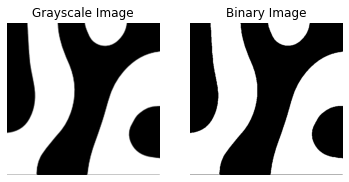

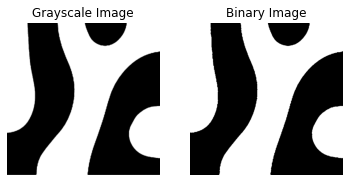

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [25]:
from skimage import io, color, measure
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 
import os
from os import listdir
from os.path import isfile, join, realpath

def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    K1 = 1e-10
    K2 = 1e-10
    # Compute SSIM
    ssim = measure.compare_ssim(img1, img2, data_range=255, K1=K1, K2=K2)

    return ssim

# Example usage
mypath = 'C:/Users/g.sergey/Downloads/'
image_path_1 = 'C:/Users/g.sergey/Downloads/d1.jpg' 
image_path_2 = 'C:/Users/g.sergey/Downloads/d2.jpg' 
ssim_value = calculate_ssim(image_path_1, image_path_2)

print(f"SSIM: {ssim_value}")

img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

# read the image file 
image1 = cv2.imread(image_path_1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray1,150,255,0)
imgRGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(image_path_2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret,thresh2 = cv2.threshold(gray2,150,255,0)

plt.subplot(121),plt.imshow(gray1,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh1,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

plt.subplot(121),plt.imshow(gray2,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh2,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

#img1 = np.array(img1)
#img2 = np.array(img2)
ssim_value_bin = calculate_ssim(thresh1, thresh2)
print(f"SSIM_bin: {ssim_value_bin}")

plt.figure()
plt.imshow(thresh1, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh1, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(thresh2, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh2, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()


print(f"SSIM: {ssim_value}")

In [24]:
import cv2
import numpy as np
#from skimage.metrics import structural_similarity as ssim

def ssim_ifc(img1, img2):
    # Convert images to grayscale
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2_inv = np.abs(255 - img2_gray)  # Create an inverted image

    # Compute SSIM values
    ssim_normal = measure.compare_ssim(img1_gray, img2_gray, data_range=255)
    ssim_inverse = measure.compare_ssim(img1_gray, img2_inv, data_range=255)

    return (ssim_normal - ssim_inverse) / (1 - ssim_inverse)

def normal_ssim(img1, img2):
    # Convert images to grayscale
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2_inv = 255 - img2_gray  # Create an inverted image

    # Compute SSIM values
    ssim_normal = measure.compare_ssim(img1_gray, img2_gray, data_range=255)
    ssim_inverse = measure.compare_ssim(img1_gray, img2_inv, data_range=255)

    return ssim_normal

# Load test images
img1 = cv2.imread("C:/Users/g.sergey/Downloads/d1.jpg")
img2 = cv2.imread("C:/Users/g.sergey/Downloads/d2.jpg")  # Different image
img_inv = np.abs(255 - img1)  # Inverted image
#ssim1 = calculate_ssim(img1, img2)
#ssim2 = calculate_ssim(img1, img_inv)
# Test cases
print("SSIM-IFC for identical images:", normal_ssim(img1, img1))  # Expected ~1
print("SSIM-IFC for inverse images:", normal_ssim(img1, img_inv)) # Expected ~-1
print("SSIM-IFC for unrelated images:", normal_ssim(img1, img2))  # Expected ~0
#print(ssim1)
#print(ssim2)

SSIM-IFC for identical images: 1.0
SSIM-IFC for inverse images: -0.032209039557765724
SSIM-IFC for unrelated images: -0.03105919513022191


<ipython-input-24-e6d5257516d9>:24: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_normal = measure.compare_ssim(img1_gray, img2_gray, data_range=255)
<ipython-input-24-e6d5257516d9>:25: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_inverse = measure.compare_ssim(img1_gray, img2_inv, data_range=255)


In [57]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def binarize_image(img):
    """Convert an image to binary using Otsu's thresholding."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 150, 255, 0)
    return binary

def normal_ssim(img1, img2):
    """Compute standard SSIM on binary images."""
    img1_bin = binarize_image(img1)
    img2_bin = binarize_image(img2)
    
    return ssim(img1_bin, img2_bin, data_range=255)

# Load test images
img1 = cv2.imread("C:/Users/g.sergey/Downloads/d1.jpg")
img2 = cv2.imread("C:/Users/g.sergey/Downloads/d2.jpg")  # Different image
img_inv = np.abs(255 - img1)  # Inverted image

img1_bin = binarize_image(img1)
img2_bin = binarize_image(img2)

K1 = 1e-10
K2 = 1e-10
ssim_test = ssim(img1_bin, img1_bin, win_size=511, gradient=False, data_range=512, channel_axis=None, gaussian_weights=False, full=False, K1=K1, K2=K2)


# Test cases
print("SSIM for identical images:", normal_ssim(img1, img1))  # Expected ~1
print("SSIM for inverse images:", normal_ssim(img1, img_inv)) # Expected ~-1
print("SSIM for unrelated images:", normal_ssim(img1, img2))  # Expected ~0
print(ssim_test)

SSIM for identical images: 1.0
SSIM for inverse images: -0.02013611997590988
SSIM for unrelated images: -0.02694190314794746
1.0
